In [11]:
%matplotlib inline
# Import necessary libraries
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

In [12]:
# Load in star data and remove the "topics" column
# We do this because the topics for this set are all null
df = pd.read_json("stars.json", lines=True).drop(["watchers_count", "topics"], axis=1)
df.head()

,created_at,description,fork,forks_count,language,name,open_issues,stargazers,url
0,2014-12-02 15:58:17,Main repository for the servant libraries -- D...,False,248,Haskell,servant,162,1124,https://api.github.com/repos/haskell-servant/s...
1,2019-01-28 17:55:49,Windows Calculator: A simple yet powerful calc...,False,1278,C++,calculator,112,10546,https://api.github.com/repos/Microsoft/calculator
2,2013-02-11 01:22:06,Basic statistics for Julia,False,109,Julia,StatsBase.jl,88,209,https://api.github.com/repos/JuliaStats/StatsB...
3,2017-03-15 05:09:01,⭐️ Companies that don't have a broken hiring ...,False,1180,JavaScript,hiring-without-whiteboards,24,11583,https://api.github.com/repos/poteto/hiring-wit...
4,2012-02-11 16:43:20,Parent module for all OneBusAway projects with...,False,68,None,onebusaway,4,258,https://api.github.com/repos/OneBusAway/onebus...


In [13]:
df.corr()

,fork,forks_count,open_issues,stargazers
fork,1.000000,-0.016028,-0.010928,-0.020995
forks_count,-0.016028,1.000000,0.315475,0.823917
open_issues,-0.010928,0.315475,1.000000,0.411399
stargazers,-0.020995,0.823917,0.411399,1.000000


## Forks and Stargazers

Immediately we can see that theres a moderately strong correlation between the amount of forks a repositoriy has and the amount of stars it gets. Intuitively, we would assume that this is because repositories that have greater community interaction (forks_count) also have utility or novelty, measured as stars.

Let's look at the relationship below:

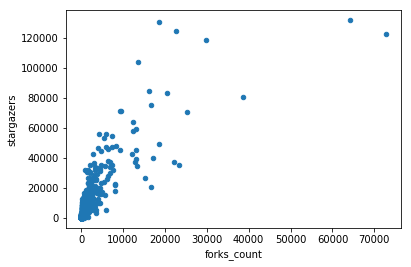

In [14]:
df.plot.scatter(x="forks_count", y="stargazers")
plt.show()

It looks like any data above 15,000 forks probably wont offer us enough information to help with prediction, so I've removed the data and plotted it against a regression line.

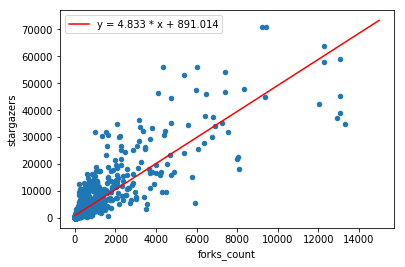

In [15]:
dfm = df[df["forks_count"] < 15000].dropna()
dfm.plot.scatter(x="forks_count", y="stargazers")

# Find the best fit linear line and plot
[b, m] = poly.polyfit(x=dfm["forks_count"], y=dfm["stargazers"], deg=1)
x = np.linspace(0, 15000, 100)
y = m * x + b
plt.plot(x, y, '-r', label=f"y = {round(m, 3)} * x + {round(b, 3)}")
plt.legend(loc="upper left")

plt.show()

From the data above, it seems that the more forks that a repository I've starred has, the more varied the distribution of stargazers gets, leading to a sort of "cone" shape.

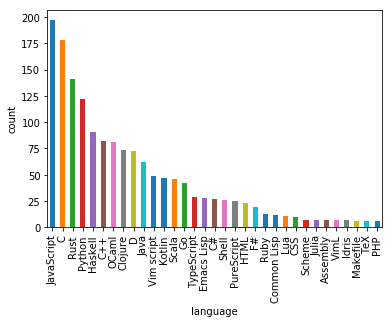

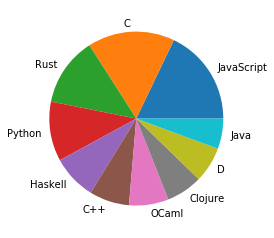

In [16]:
# Plot a bar graph of language frequencies
dfl = df["language"].value_counts().reset_index()
dfl.columns = ["language", "count"]
dfl = dfl[dfl["count"] > 5]
ax = dfl.plot.bar(x="language", y="count", legend=False)
ax.set_ylabel("count")
plt.show()

# Plot top ten as a pie chart
topten = dfl[:10]
ax = topten.plot.pie(x="language", y="count", labels=topten["language"], legend=False)
ax.set_ylabel(None)
plt.show()

From this, we can see that my most liked languages are JavaScript, C, Rust, Python, and Haskell. This is no surprise, as Haskell/Rust are always in my heart and I work with C, Python, and Javascript often.